# Análise da Pontuação de Cupping de Cafés
___


## Categorias

* total_cup_points: Total de pontos (0 - 100)
* species: Espécie do café (arábica ou robusta)
* owner: Proprietário da fazenda
* country_of_origin: Origem do café
* farm_name: Nome da fazenda
* lot_number: Número do lote
* mill: Local de processamento do café
* ico_number: Número - International Coffee Organization
* company: Nome da companhia
* altitude: Altitude
* region: Região
* producer: Produtor do café torrado
* number_of_bags: Número de embalagens/sacos utilizados para o teste
* bag_weight: Massa do café testado
* in_country_partner: Parceiro do produtor no país (EUA)
* harvest_year: Ano de colheita dos grãos
* grading_date: Data de teste e pontuação dos grãos
* owner_1: Proprietário dos grãos
* variety: Variedade dos grãos
* processing_method: Método de processamento
* aroma: Nota do aroma
* flavor: Nota do sabor
* aftertaste: Nota do sabor residual (aftertaste)
* acidity: Nota da acidez
* body: Nota do corpo
* balance: Nota de equilíbrio (balance)
* uniformity: Nota de uniformidade
* clean_cup: Nota Clean Cup - ausência de defeitos no perfil de sabor do café
* sweetness: Nota de doçura
* cupper_points: Nota atribuída pelo avaliador (Cupper)
* moisture: Nota de umidade
* category_one_defects: Defeitos do tipo 1 (número de grãos)
* quakers: Presença (1) ou não (0) de grãos subdesenvolvidos (quakers)
* color: Cor do grão
* category_two_defects: Defeitos do tipo 2 (número de grãos)
* expiration: Data de validade dos grãos
* certification_body: Entidade certificadora
* certification_address: Endereço da entidade certificadora
* certification_contact: Contato de certificação
* unit_of_measurement: Unidade de medida
* altitude_low_meters: Altitude mínima (metros)
* altitude_high_meters: Altitude máxima (metros)
* altitude_mean_meters: Altitude média (metros)

## O que quero responder?

De acordo com a base de dados, quero entender o que leva um café a ter uma boa pontuação no Coffee Cuping. Para isso, irei avaliar as variáveis e então criar um modelo que além de classificar e prever as possíveis notas no Coffee Cupping para um café com determinadas características, possa dizer qual o café com as características perfeitas para tirar a melhor nota possível.

___
## Análise exploratória


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
sns.set()

pd.options.display.max_columns = None
%matplotlib inline

In [23]:
raw_data = pd.read_excel('./Base_7/base_7.xlsx')

In [24]:
raw_data.head(10)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,producer,number_of_bags,bag_weight,in_country_partner,harvest_year,grading_date,owner_1,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.0,10.00,8.75,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.0,10.00,8.58,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.0,10.00,9.25,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.0,10.00,8.67,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.0,10.00,8.58,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
5,88.83,Arabica,ji-ae ahn,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,30 kg,Specialty Coffee Institute of Asia,2013,"September 3rd, 2013",Ji-Ae Ahn,NaN,Natural / Dry,8.58,8.42,8.42,8.50,8.25,8.33,10.00,10.0,10.00,8.33,0.11,0,0.0,Bluish-Green,1,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
6,88.75,Arabica,hugo valdivia,Peru,NaN,NaN,hvc,NaN,richmond investment-coffee department,NaN,NaN,HVC,100,69 kg,Specialty Coffee Institute of Asia,2012,"September 17th, 2012",Hugo Valdivia,Other,Washed / Wet,8.42,8.50,8.33,8.50,8.25,8.25,10.00,10.0,10.00,8.50,0.11,0,0.0,Bluish-Green,0,"September 17th, 2013",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
7,88.67,Arabica,ethiopia commodity exchange,Ethiopia,aolme,NaN,c.p.w.e,010/0338,NaN,1570-1700,oromia,Bazen Agricultural & Industrial Dev't Plc,300,60 kg,Ethiopia Commodity Exchange,March 2010,"September 2nd, 2010",Ethiopia Commodity Exchange,NaN,NaN,8.25,8.33,8.50,8.42,8.

In [25]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_cup_points       1339 non-null   float64
 1   species                1339 non-null   object 
 2   owner                  1332 non-null   object 
 3   country_of_origin      1338 non-null   object 
 4   farm_name              980 non-null    object 
 5   lot_number             276 non-null    object 
 6   mill                   1021 non-null   object 
 7   ico_number             1182 non-null   object 
 8   company                1130 non-null   object 
 9   altitude               1113 non-null   object 
 10  region                 1280 non-null   object 
 11  producer               1107 non-null   object 
 12  number_of_bags         1339 non-null   int64  
 13  bag_weight             1339 non-null   object 
 14  in_country_partner     1339 non-null   object 
 15  harv

In [26]:
# Dividindo colunas em grupos

drop_columns = ['owner', 'farm_name', 'lot_number', 'mill', 'ico_number', 'company', 'producer', 'number_of_bags', 
                'bag_weight', 'in_country_partner', 'harvest_year', 'grading_date', 'owner_1', 'expiration', 
                'certification_body', 'certification_address', 'certification_contact', 'unit_of_measurement', 'region', 
                'altitude', 'country_of_origin', 'altitude_low_meters', 'altitude_high_meters']

note_columns = ['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness', 
                'cupper_points', 'moisture', 'total_cup_points']

defect_columns = ['category_one_defects', 'quakers', 'category_two_defects']

coffee_grow_columns = ['species', 'variety', 'processing_method', 'color', 'altitude_mean_meters']

In [27]:
# Criando o dataset com as informações relevantes

data = raw_data.copy()

# Retirando colunas indesejadas
for column in drop_columns:
    data.drop(column, axis=1, inplace=True)
    
# Preenchendo valores nulos nas notas
for column in note_columns:
    data[column].fillna(0)
    
data.loc[data.color == 'None', 'color'] = np.nan
    
data.head()

,total_cup_points,species,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,color,category_two_defects,altitude_mean_meters
0,90.58,Arabica,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,0.12,0,0.0,Green,0,2075.0
1,89.92,Arabica,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,0.12,0,0.0,Green,1,2075.0
2,89.75,Arabica,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,0.00,0,0.0,NaN,0,1700.0
3,89.00,Arabica,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,0.11,0,0.0,Green,2,2000.0
4,88.83,Arabica,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,0.12,0,0.0,Green,2,2075.0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_cup_points      1339 non-null   float64
 1   species               1339 non-null   object 
 2   variety               1113 non-null   object 
 3   processing_method     1169 non-null   object 
 4   aroma                 1339 non-null   float64
 5   flavor                1339 non-null   float64
 6   aftertaste            1339 non-null   float64
 7   acidity               1339 non-null   float64
 8   body                  1339 non-null   float64
 9   balance               1339 non-null   float64
 10  uniformity            1339 non-null   float64
 11  clean_cup             1339 non-null   float64
 12  sweetness             1339 non-null   float64
 13  cupper_points         1339 non-null   float64
 14  moisture              1339 non-null   float64
 15  category_one_defects 

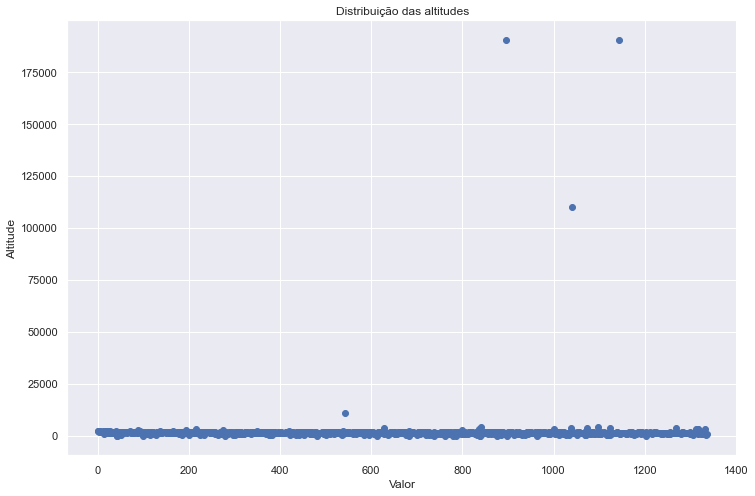

In [29]:
# Identificando outliers errados que danificam a análise da altitude média

plt.figure(figsize=(12,8))
plt.scatter(range(len(data.altitude_mean_meters)), data.altitude_mean_meters)
plt.title('Distribuição das altitudes')
plt.xlabel('Valor')
plt.ylabel('Altitude')
plt.show()

In [30]:
# Como o ponto mais alto do mundo é 8.848m (Pico do Everest), vamos desconsiderar todos os pontos acima disso

data.loc[data.altitude_mean_meters >= 8848,'altitude_mean_meters'] = 0

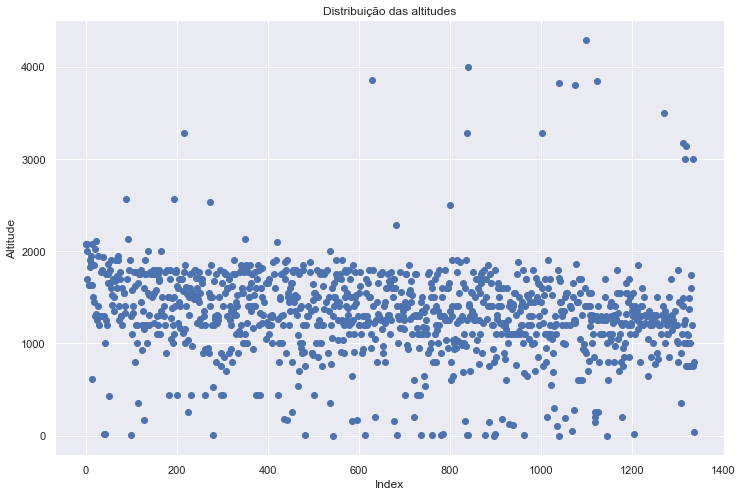

In [31]:
# Gráfico da distribuição real das altitudes

plt.figure(figsize=(12,8))
plt.scatter(range(len(data.altitude_mean_meters)), data.altitude_mean_meters)
plt.title('Distribuição das altitudes')
plt.xlabel('Index')
plt.ylabel('Altitude')
plt.show()

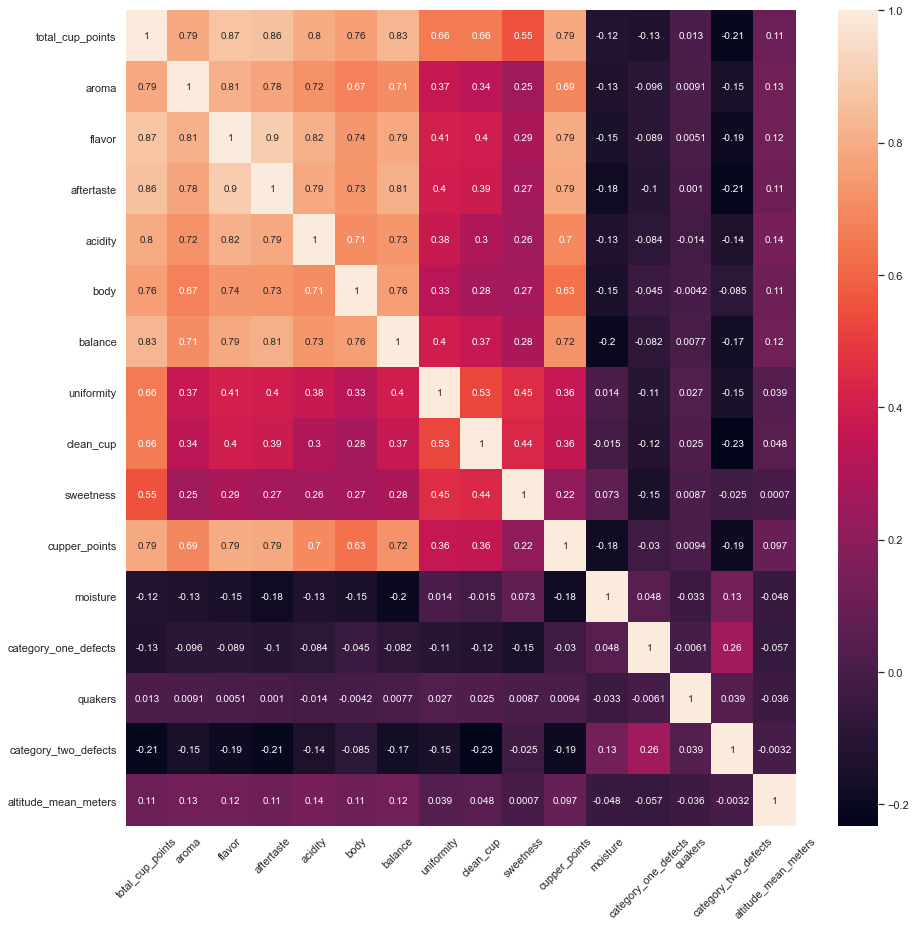

In [32]:
# Heatmap de correlações

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

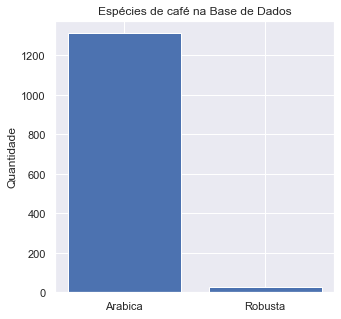

In [33]:
# Barplot das espécies

plt.figure(figsize=(5,5))
plt.bar(data.species.unique(), data.species.value_counts())
plt.title('Espécies de café na Base de Dados')
plt.ylabel('Quantidade')
plt.show()

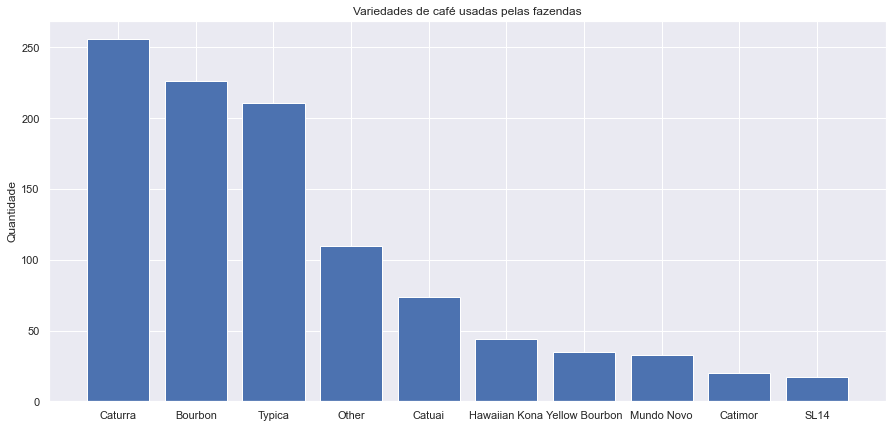

In [34]:
# Barplot das variedades

# Lista das top10 variedades mais comuns
lista_variedades = ['Caturra','Bourbon','Typica','Other','Catuai','Hawaiian Kona',
                    'Yellow Bourbon','Mundo Novo','Catimor','SL14']

plt.figure(figsize=(15,7))
plt.bar(lista_variedades, data.variety.value_counts()[:10])
plt.title('Variedades de café usadas pelas fazendas')
plt.ylabel('Quantidade')
plt.show()

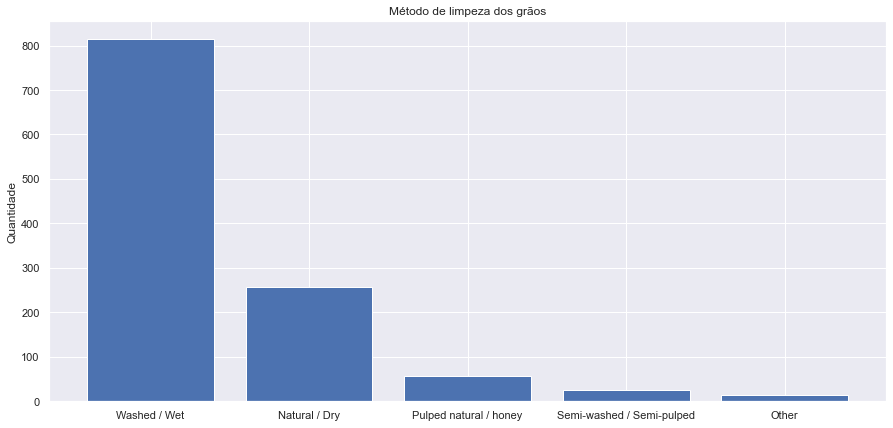

In [35]:
# Barplot dos métodos de limpeza

plt.figure(figsize=(15,7))
plt.bar(data.processing_method.dropna().unique(), data.processing_method.dropna().value_counts())
plt.title('Método de limpeza dos grãos')
plt.ylabel('Quantidade')
plt.show()

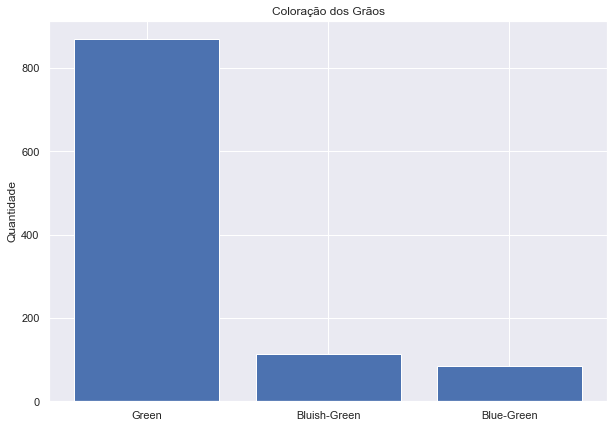

In [36]:
# Barplot da coloração dos grãos

plt.figure(figsize=(10,7))
plt.bar(data.color.dropna().unique(), data.color.dropna().value_counts())
plt.title('Coloração dos Grãos')
plt.ylabel('Quantidade')
plt.show()

In [37]:
# Filtragem apenas das fazendas top 100 notas

top100 = data.loc[:99,:]
top100

,total_cup_points,species,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,color,category_two_defects,altitude_mean_meters
0,90.58,Arabica,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,0.12,0,0.0,Green,0,2075.0
1,89.92,Arabica,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,0.12,0,0.0,Green,1,2075.0
2,89.75,Arabica,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,0.00,0,0.0,NaN,0,1700.0
3,89.00,Arabica,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,0.11,0,0.0,Green,2,2000.0
4,88.83,Arabica,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,0.12,0,0.0,Green,2,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,85.08,Arabica,NaN,NaN,7.50,7.92,8.25,7.83,7.92,7.75,10.0,10.0,10.0,7.92,0.00,0,0.0,NaN,0,NaN
96,85.00,Arabica,SL14,Washed / Wet,8.17,7.92,7.75,7.75,7.67,7.75,10.0,10.0,10.0,8.00,0.11,0,0.0,Green,1,1800.0
97,85.00,Arabica,Caturra,Washed / Wet,8.00,7.92,7.75,7.92,7.75,7.83,10.0,10.0,10.0,7.83,0.00,0,0.0,Green,3,NaN
98,85.00,Arabica,Catuai,Washed / Wet,7.83,8.00,7.58,7.92,7.92,7.83,10.0,10.0,10.0,7.92,0.12,1,1.0,Green,1,1900.0


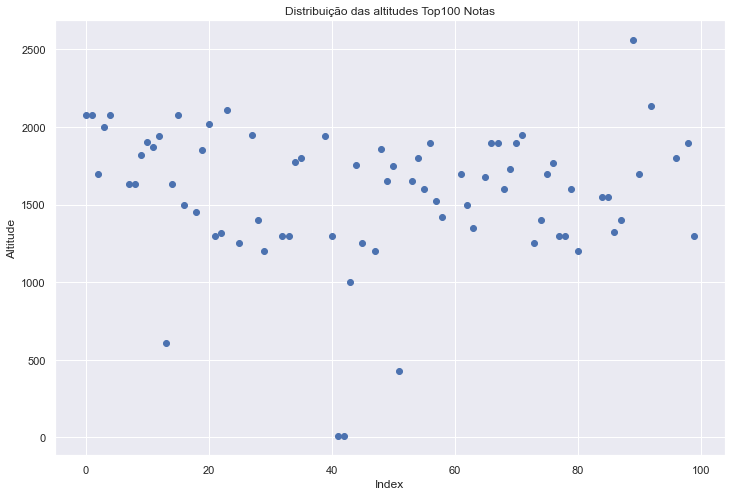

In [38]:
# Scatter das altitudes das top100 notas
plt.figure(figsize=(12,8))
plt.scatter(range(len(top100.altitude_mean_meters)), top100.altitude_mean_meters)
plt.title('Distribuição das altitudes Top100 Notas')
plt.xlabel('Index')
plt.ylabel('Altitude')
plt.show()

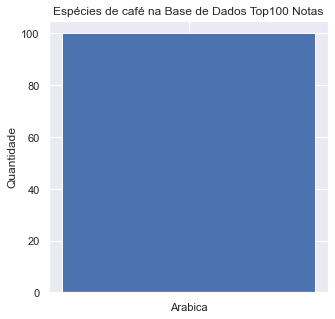

In [39]:
# Barplot das espécies das top 100 notas

plt.figure(figsize=(5,5))
plt.bar(top100.species.unique(), top100.species.value_counts())
plt.title('Espécies de café na Base de Dados Top100 Notas')
plt.ylabel('Quantidade')
plt.show()

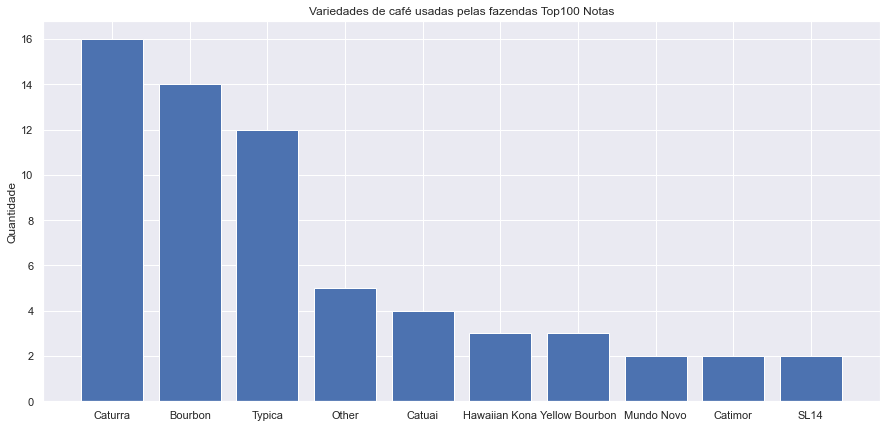

In [40]:
# Barplot das variedades da top 100 notas

plt.figure(figsize=(15,7))
plt.bar(lista_variedades, top100.variety.value_counts()[:10])
plt.title('Variedades de café usadas pelas fazendas Top100 Notas')
plt.ylabel('Quantidade')
plt.show()

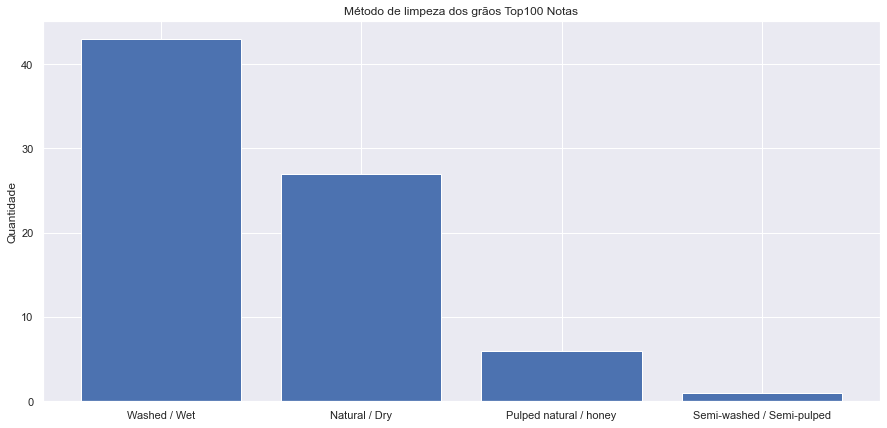

In [41]:
# Barplot dos métodos de limpeza das top 100 notas

plt.figure(figsize=(15,7))
plt.bar(top100.processing_method.dropna().unique(), top100.processing_method.dropna().value_counts())
plt.title('Método de limpeza dos grãos Top100 Notas')
plt.ylabel('Quantidade')
plt.show()

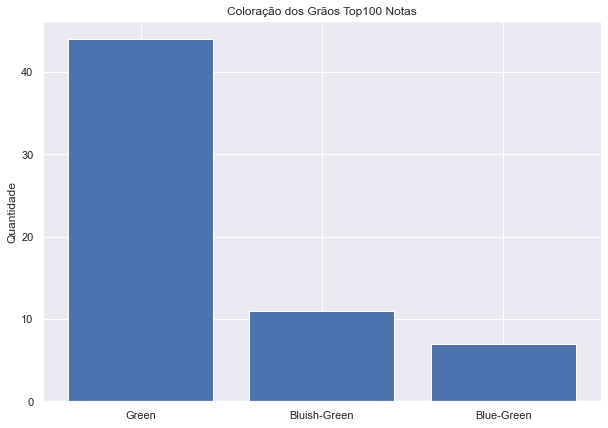

In [42]:
# Barplot da coloração do grãos das top 100 notas

plt.figure(figsize=(10,7))
plt.bar(top100.color.dropna().unique(), top100.color.dropna().value_counts())
plt.title('Coloração dos Grãos Top100 Notas')
plt.ylabel('Quantidade')
plt.show()